Using wine data this book looks at clusters of different red wines in order to determine how to get the greatest variety in a group of wines.  This first cell reads in the wine data and z score transforms entire table.  

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

headers = ['cultivar', 'alcohol', 'malic acid', 'ash', 'alcalinity of ash', 'magnesium', 'total phenols', 'flavanoids', 'nonflavanoid phenols',
    'proanthocyanins', 'color intensity', 'hue', 'OD280/OD315', 'proline']

wine = pd.read_csv('wine.data', delimiter=',')
wine.columns = headers
wine.drop(axis=1, labels=['cultivar'], inplace=True)

wine = pd.DataFrame(scaler.fit_transform(wine), columns=wine.columns)
#print(wine.head())
print(wine.max(), wine.min())

alcohol                 2.276852
malic acid              3.100048
ash                     3.149233
alcalinity of ash       3.151249
magnesium               4.415790
total phenols           2.541633
flavanoids              3.069345
nonflavanoid phenols    2.394874
proanthocyanins         3.497023
color intensity         3.427800
hue                     3.295669
OD280/OD315             1.985052
proline                 2.977465
dtype: float64 alcohol                -2.434746
malic acid             -1.433400
ash                    -3.668064
alcalinity of ash      -2.680472
magnesium              -2.093373
total phenols          -2.100648
flavanoids             -1.690491
nonflavanoid phenols   -1.868993
proanthocyanins        -2.065084
color intensity        -1.628565
hue                    -2.087573
OD280/OD315            -1.897707
proline                -1.487599
dtype: float64


Lets get to pair plotting.  What I take away from this is that there could be two to three different groupings of wine.  The features that distinguish these groups seem to be OD280/OD315, perhaps alcohol or flavanoids or total phenols, and color intensity 

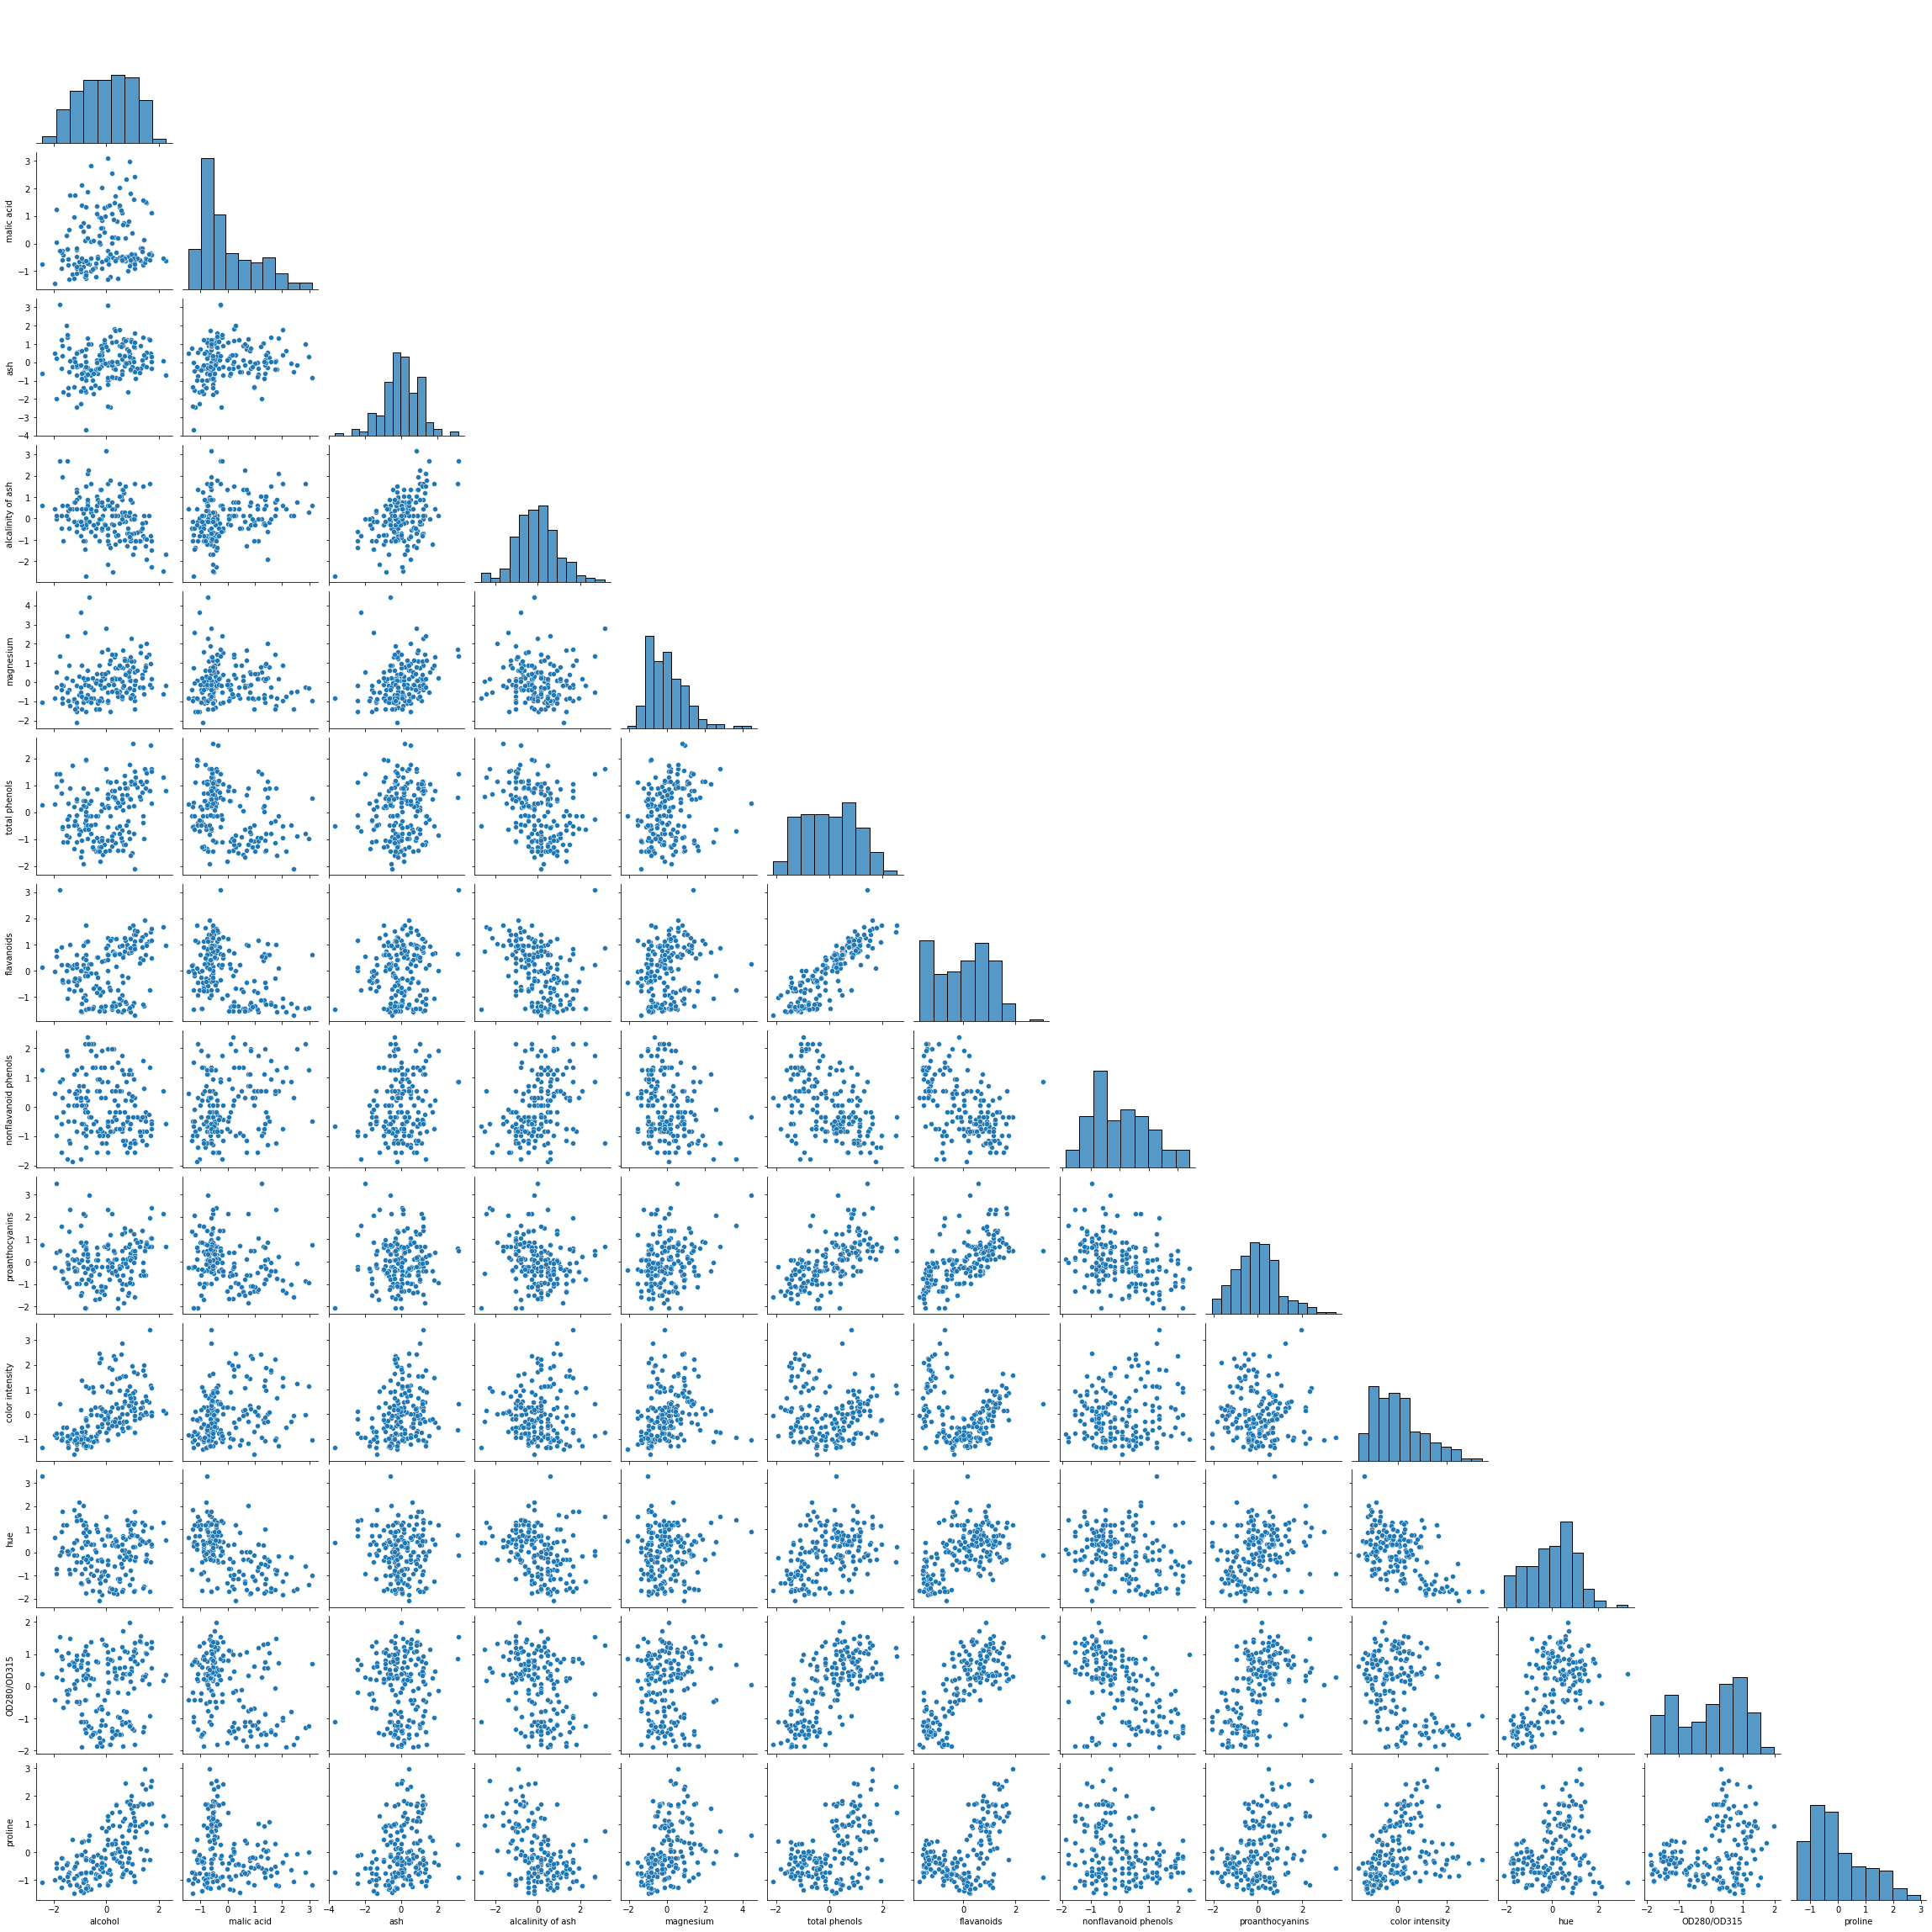

In [52]:
import seaborn as sns

sns.pairplot(wine, diag_kind='hist', corner=True)


Now with a general idea of what features on which to group wines the next step will be to do a PCA to determine which features to cluster on.  

        alcohol  malic acid       ash  alcalinity of ash  magnesium  \
comp1  0.137888   -0.246381 -0.004318          -0.237380   0.135002   
comp2 -0.485835   -0.221575 -0.315282           0.012143  -0.300288   
comp3 -0.208775    0.090193  0.623743           0.613799   0.135732   
comp4 -0.001141    0.533136 -0.205348           0.057224  -0.391694   
comp5 -0.269891    0.062876 -0.160366           0.064811   0.706344   
comp6 -0.211410   -0.530707 -0.155115           0.094111  -0.038510   
comp7 -0.057520    0.433730 -0.145135          -0.290422   0.318430   
comp8 -0.401084   -0.062884  0.171434          -0.427772   0.151966   
comp9  0.488253   -0.050643 -0.314515           0.200022   0.270398   

       total phenols  flavanoids  nonflavanoid phenols  proanthocyanins  \
comp1       0.395869    0.424394             -0.299136         0.312803   
comp2      -0.070549   -0.001732             -0.024669        -0.041446   
comp3       0.144620    0.149318              0.169136         0

Text(0, 0.5, 'proportion of variance explained')

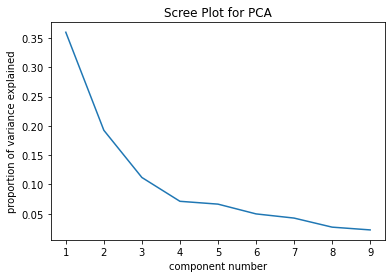

In [72]:
from sklearn.decomposition import PCA

pca = PCA(n_components=9)
principals = pca.fit_transform(wine)

principal_df = pd.DataFrame(principals, columns=['comp1', 'comp2', 'comp3', 'comp4', 'comp5', 'comp6', 'comp7', 'comp8', 'comp9'])
pca_info = list(pca.explained_variance_ratio_)
pca_df = pd.DataFrame(pca.components_, columns=wine.columns, index=['comp1', 'comp2', 'comp3', 'comp4', 'comp5', 'comp6', 'comp7', 'comp8', 'comp9'])
print(pca_df)
print(pca_info)
print(sum(pca_info))
sns.pairplot(principal_df, corner=True, diag_kind='kde')

plt.plot([i for i in range(1,10)], pca_info)
plt.title('Scree Plot for PCA')
plt.xlabel('component number')
plt.ylabel('proportion of variance explained')


The pca analysis shows that with 8 components the data still contains 94% of the information.  Now I am becoming more convinced that there are 2 to 3 clusters in the wine.  As most of the variance is in comp1 I find it wise to use an algorithm suited to blobby clusters as opposed to linear.  So k-means++ it is.  

      comp1     comp2     comp3     comp4     comp5     comp6     comp7  \
0  2.230243  0.302313 -2.032920 -0.281906 -0.259540 -0.927615  0.079724   
1  2.531922 -1.062257  0.976724  0.735727 -0.198602  0.557252  0.432350   
2  3.754677 -2.805309 -0.180370  0.577125 -0.257871  0.100109 -0.364924   
3  1.020131 -0.888380  2.023870 -0.432792  0.275235 -0.403139  0.454721   
4  3.049199 -2.170007 -0.638747 -0.487628 -0.631358  0.130817  0.421297   

      comp8     comp9  label_kmeans  
0  1.026470 -0.313145             0  
1 -0.335611 -1.179069             0  
2  0.646847  0.067906             0  
3  0.412033  0.338059             0  
4  0.398731 -0.113454             0  


<AxesSubplot:xlabel='label_kmeans', ylabel='count'>

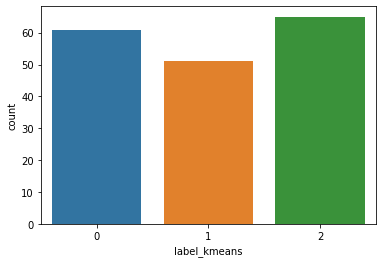

In [65]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(principal_df)
labels = kmeans.labels_

final_df = pd.DataFrame(data=principal_df, columns = ['comp1', 'comp2', 'comp3', 'comp4', 'comp5', 'comp6', 'comp7', 'comp8', 'comp9'])
final_df['label_kmeans'] = labels

print(final_df.head())

sns.countplot(x='label_kmeans', data=final_df)